<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 4

### Juan Manuel Ronchetti

## Dada la siguiente plantilla:
<img src="./img/Plantilla.png" /> 

### Se pide:
1) Obtener la transferencia de máxima planicidad del filtro requerido.
 
2) Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.

3) Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).

4) Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.

## 1) y 2) - Obtencion de la transferencia y diagramas de polos y ceros

In [2]:
from IPython.display import IFrame
IFrame("./img/TS4_1.pdf", width=900, height=1200)

Como se observa de la deduccion en papel, la transferencia del pasa-altos resulta:
\begin{equation} T(s) = \frac{s}{s + 1} \cdot \frac{s^2}{s^2 + s + 1} \end{equation}

La transferencia es exactamente la misma que para un filtro pasa-bajos Butterworth de orden 3, pero con un cero triple en el origen. Esta es la unica diferencia que se observa en los diagramas de polos y ceros del pasa-altos y el pasa-bajos prototipo.

### Simulacion númerica

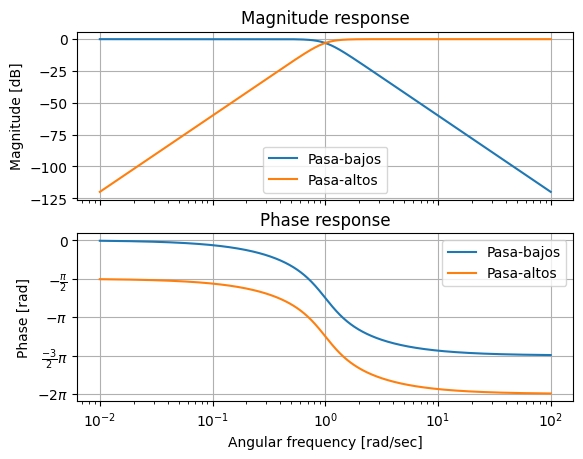

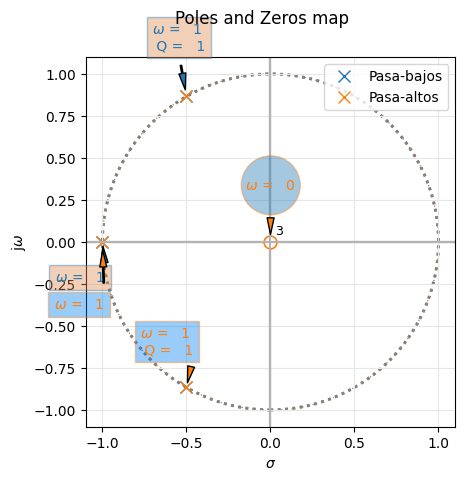

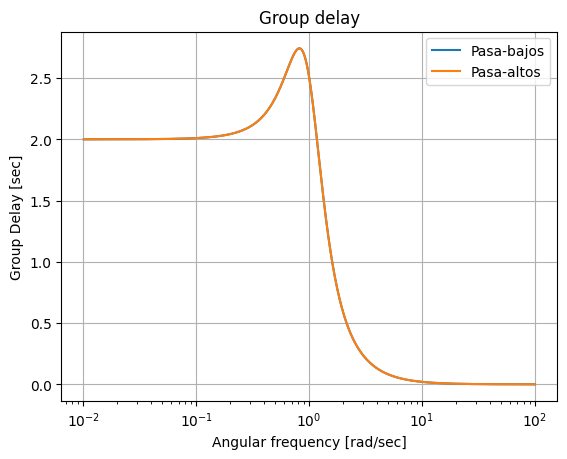

In [2]:
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys

# Se arma el pasabajos 
num= [1]
den= np.polymul([1, 1], [1, 1, 1])
tf_lp = sig.TransferFunction(num, den)

# Se plotea el pasabajos
analyze_sys( tf_lp, 'Pasa-bajos' )

# Se arma el pasaaltos y se plotea
num_hp, den_hp = sig.lp2hp(num, den)
analyze_sys( sig.TransferFunction(num_hp, den_hp), 'Pasa-altos' )

Como se observa en la simulacion numerica, el resultado es el mismo que el obtenido en papel.


Es importante aclarar que la transferencia normalizadada fue obtenida a partir de una transferencia tipo Butterworth, donde el $\alpha_{max} = 3 dB$ en vez de 1. Esto es corregido durante la desnormalizacion, al aplicar la $\omega_B = 2 \pi f_p \epsilon^{\frac{1}{n}}$ indicada en el desarrollo en papel.

## 3) Implementacion normalizada con estructuras pasivas

Para la implementacion, se emplearon un circuito RLC con salida en el inductor y un circuito CR en cascada para obtener la transferencia de tercer orden hallada.
Al no pedir ningun valor especifico para ningun componente, no existe restriccion para definir la norma de impedancia, por ende para facilitar los calculos se definio una $\Omega_z = R = 1k\Omega$, resultando en una $R_n = 1$.

<img src="./img/TS4_3.png"  width=650 />

Nuevamente se señala que al haber obtenido el circuito normalizado a partir de una transferencia tipo Butterworth, el $\alpha_{max} = 3 dB$ en vez de 1. Se simulará en primer lugar el circuito normalizado, y en segundo lugar el circuito desnormalizado, donde se aplica la $\omega_B$.


### Simulacion circuital normalizada
El circuito construido resulta entonces:

<img src="./img/Circuito_Norm.png"  width=650 /> 

A continuacion se observan los resultados de la simulacion circuital:
<img src="./img/Respuesta_Norm.png"  width=650 /> 

Se observa una frecuencia de corte de $160mHz$, la cual corresponde a $1\frac{rad}{s}$, por lo que el resultado fue exitoso. Como se señaló anteriormente, la frecuencia de corte se halla a los $-3dB$ al haber partido de una transferencia prototipo Butterworth. Esto se solucionará a continuacion al desnormalizar el circuito. 

### Simulacion circuital desnormalizada
Aplicando las ecuaciones de desnormalizacion, los valores de los componentes resultan:
* $R = R_n \cdot \Omega_z = 1 \cdot 1k\Omega = 1k\Omega$
* $L = L_n \cdot \frac{\Omega_z}{\omega_B} = 1 \cdot \frac{1k\Omega}{200668 \frac{rad}{s}} = 5mHy$
* $C = C_n \cdot \frac{1}{\Omega_z\cdot\omega_B} = 1 \cdot \frac{1}{1k\Omega\cdot200668 \frac{rad}{s}} = 5nF$

El circuito resulta:
<img src="./img/Circuito_Des.png"  width=650 /> 

A continuacion se observan los resultados de la simulacion circuital:
<img src="./img/Respuesta_Des_1.png"  width=650 />
<img src="./img/Respuesta_Des_2.png"  width=650 />

Se observa que se obtuvieron exitosamente los valores pedidos para $f_s$ y $f_p$.

## 4) Reemplazo de inductores con GIC

En esta seccion se busco implementar la misma transferencia pero reemplazando el inductor por el GIC de Antoniou. Al hallarse con una referencia a masa, fue posible emplear el GIC en la configuracion de girador, como se muestra a continuacion:

<img src="./img/TS4_4.png"  width=650 />

La inductancia que se necesita reemplazar es de $5mHy$. Se observa que es posible hacerlo utilizando los resistores de $1k\Omega$ y los capacitores de $5nF$ que se habian utilizado anteriormente:
\begin{equation} \frac{5nF \cdot (1k\Omega)^3}{1k\Omega} = 5mHy \end{equation}

Aplicando los componentes desnormalizados, a continuacion se muestran el circuito resultante y la transferencia obtenida:
<img src="./img/Circuito_GIC.png"  width=850 /> 
<img src="./img/Respuesta_GIC.png"  width=650 /> 

Se observa que la transferencia obtenida es la misma que con el inductor, por lo que el resultado es correcto.